In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 5us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [5]:
# feature-wise normalization
mean = train_data.mean(axis=0)
std = train_data.std()

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation=None))

    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
import numpy as np

In [15]:
# Cross validation

k=4
num_val_samples = train_data.shape[0] // k
num_epochs = 500
all_scores = []

for i in range(k):
    x_val = train_data[i*num_val_samples:(i+1)*num_val_samples]
    y_val = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    x_train_partial = np.concatenate([train_data[:i*num_val_samples], 
                                      train_data[(i+1)*num_val_samples:]])
    y_train_partial = np.concatenate([train_targets[:i*num_val_samples],
                                      train_targets[(i+1)*num_val_samples:]])
    
    model = build_model()
    history = model.fit(x_train_partial, y_train_partial, epochs=num_epochs, 
                        validation_data=(x_val, y_val),
                        verbose=0, batch_size=1)
    
    #val_mse, val_mae = model.evaluate(x_val, y_val)
    all_scores.append(history.history['val_mean_absolute_error'])

In [19]:
score_mean = np.mean(np.array(all_scores), axis=0)

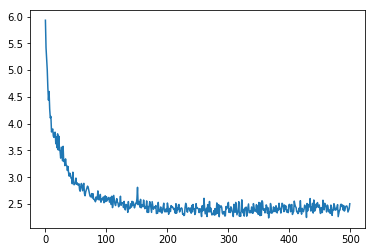

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(score_mean)

In [22]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [23]:
smooth_score = smooth_curve(score_mean)

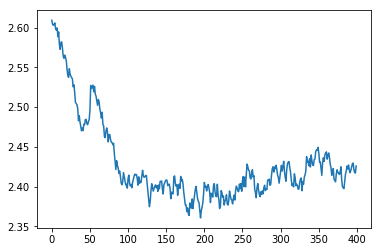

In [25]:
plt.plot(smooth_score[100:])

In [27]:
model = build_model()
model.fit(train_data, train_targets, batch_size=1, epochs=200, verbose=0)
test_mae = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 903us/step


In [28]:
test_mae

[17.809895833333332, 2.4084037799461213]